# Regression_linearRegression

回归任务有监督模型综合对比分析需要同学们自行搜集回归任务的数据集（一个即可），使用学过的线性回归、决策树、神经网络、支持向量机四个模型（可以使用Scikit-learn或其他工具包）在该数据集上进行对比评测，要求：

1.每个方法尝试不同参数，运用MAE,RMSE,RMAE三个指标进行对比评测，把结果绘制成表格（四个模型三个表格）和可视化图（只可视化数值型参数即可，如SVM的C，决策树的深度等，每个模型每个参数一张图）

2.运用第1条尝试得到的最优参数对四个模型进行横向对比，计算Accuracy, Precision, Recall, F1四个指标，把结果绘制成表格

## 1. 导入必要的模块

In [1]:
# 导入必要的模块
from sklearn.preprocessing import scale  # 使用scikit-learn进行数据预处理
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import GridSearchCV

from sklearn import datasets
from sklearn.neural_network import MLPRegressor
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

## 2. 数据预处理

回归使用的是波士顿房价数据集，数据集描述如下：

https://www.cnblogs.com/wwwjjjnnn/p/7323862.html

In [2]:
# 加载数据集并随机划分训练测试集
# 读取数据文件
boston  = datasets.load_boston()
# 提取feature
feature = boston.data
# 提取label
label = boston.target

# 随机划分训练测试集，其中80%训练，20%测试
X_train,X_test, Y_train, Y_test = train_test_split(feature,label,test_size=0.2, random_state=0)
# 数据归一化
min_max_scaler = preprocessing.MinMaxScaler()
# 将数据进行归一化
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

Y_trainTemp = np.zeros((Y_train.shape[0],1),Y_train.dtype)
Y_trainTemp[:,0] = Y_train

Y_testTemp = np.zeros((Y_test.shape[0],1),Y_test.dtype)
Y_testTemp[:,0] = Y_test

Y_train = min_max_scaler.fit_transform(Y_trainTemp)
Y_test = min_max_scaler.transform(Y_testTemp)

## 3. Linear regression

Linear Regression train r2:0.7730135569264233 test r2:0.5892223849182499
Coef:
 [[-0.23615265  0.099511    0.00332529  0.05201786 -0.17413493  0.43012783
  -0.0067346  -0.33742755  0.12480226 -0.12796821 -0.21848131  0.07147347
  -0.38602097]]
[Train][Linear Regression][RMSE]: 0.09769307
[Train][Linear Regression][R2]: 0.77301356
[Train][Linear Regression][MAE]: 0.06895903
[Test][Linear Regression][RMSE]: 0.12852243
[Test][Linear Regression][R2]: 0.58922238
[Test][Linear Regression][MAE]: 0.08539798


Text(0, 0.5, 'Value')

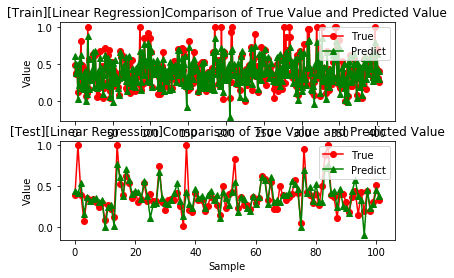

In [3]:
lr_regressor = linear_model.LinearRegression()
lr_regressor.fit(X_train,Y_train)
predict_y_train = lr_regressor.predict(X_train)
predict_y_test = lr_regressor.predict(X_test)
scores_train = lr_regressor.score(X_train,Y_train)
scores_test = lr_regressor.score(X_test,Y_test)
print('Linear Regression train r2:{0} test r2:{1}'.format(scores_train,scores_test))

print('Coef:\n',lr_regressor.coef_)


# The mean squared error
print('[Train][Linear Regression][RMSE]: %.8f'
      % np.sqrt(mean_squared_error(Y_train, predict_y_train)))
# Explained variance score: 1 is perfect prediction
#  R2 决定系数（拟合优度）
print('[Train][Linear Regression][R2]: %.8f' % r2_score(Y_train, predict_y_train))
# MAE
print('[Train][Linear Regression][MAE]: %.8f' % mean_absolute_error(Y_train, predict_y_train))
# The mean squared error
print('[Test][Linear Regression][RMSE]: %.8f'
      % np.sqrt(mean_squared_error(Y_test, predict_y_test)))
# Explained variance score: 1 is perfect prediction
#  R2 决定系数（拟合优度）
print('[Test][Linear Regression][R2]: %.8f' % r2_score(Y_test, predict_y_test))
# MAE
print('[Test][Linear Regression][MAE]: %.8f' % mean_absolute_error(Y_test, predict_y_test))

plt.figure()
plt.subplot(211)
f1 = plt.plot(Y_train,'ro-')
f2 = plt.plot(predict_y_train,'g^-')
plt.axis('tight')
plt.title("[Train][Linear Regression]Comparison of True Value and Predicted Value")
plt.legend(labels=['True','Predict'],loc='upper right')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.subplot(212)
f1 = plt.plot(Y_test,'ro-')
f2 = plt.plot(predict_y_test,'g^-')
plt.axis('tight')
plt.title("[Test][Linear Regression]Comparison of True Value and Predicted Value")
plt.legend(labels=['True','Predict'],loc='upper right')
plt.xlabel('Sample')
plt.ylabel('Value')

plt.show()